# 승하차 정류장별 버스내 체류시간 분석

In [166]:
import pandas as pd 

In [167]:
file_path = 'C:/STUDY/busan220608/8_day_포항시_교통카드_사용내역_분석/trfcard_total.csv'
trfcard_total = pd.read_csv(file_path)
trfcard_total

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y
0,20200103051542,20200103053306,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,문덕사거리,129.403442,35.962846,대잠사거리,129.344492,36.011164
1,20200103052028,20200103053715,101,양덕-고속터미널-동해,일반,N,N,삼성쉐르빌,129.405116,36.086449,북구청,129.367128,36.041941
2,20200103052103,20200103055811,131,양덕-송도-시청-양학-양덕,일반,N,N,우방비치타운,129.376287,36.054774,시외버스터미널,129.350290,36.013280
3,20200103052126,20200103053837,101,양덕-고속터미널-동해,일반,N,N,풍림아이원,129.401705,36.085096,중앙상가,129.365281,36.037455
4,20200103052217,20200103053227,108,양덕-죽도-양학-시청-유강-지곡,일반,N,N,장량휴먼시아,129.383462,36.090800,두호초등학교,129.371202,36.064088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
842603,20200102232423,20200102233802,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,Y,N,죽도시장,129.365486,36.034110,문화예술회관,129.365551,36.010599
842604,20200102232449,20200102232657,200,양덕-남구청(야구장)-구룡포,일반,N,N,형산로터리,129.368470,36.011630,뱃머리 평생학습원,129.354538,36.009020
842605,20200102232849,20200102233230,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,남부경찰서,129.344637,36.005408,연일전통시장,129.349210,35.997120
842606,20200102233518,20200102235624,107,문덕-시외(고속)터미널-흥해,일반,N,N,쌍용사거리,129.354637,36.015728,화이트빌라,129.406610,35.957090


In [168]:
trfcard_total_new = trfcard_total[['승차시각','하차시각','승차정류장','하차정류장']]
trfcard_total_new

,승차시각,하차시각,승차정류장,하차정류장
0,20200103051542,20200103053306,문덕사거리,대잠사거리
1,20200103052028,20200103053715,삼성쉐르빌,북구청
2,20200103052103,20200103055811,우방비치타운,시외버스터미널
3,20200103052126,20200103053837,풍림아이원,중앙상가
4,20200103052217,20200103053227,장량휴먼시아,두호초등학교
...,...,...,...,...
842603,20200102232423,20200102233802,죽도시장,문화예술회관
842604,20200102232449,20200102232657,형산로터리,뱃머리 평생학습원
842605,20200102232849,20200102233230,남부경찰서,연일전통시장
842606,20200102233518,20200102235624,쌍용사거리,화이트빌라


In [17]:
trfcard_total_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842608 entries, 0 to 842607
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   승차시각    842608 non-null  int64 
 1   하차시각    842608 non-null  int64 
 2   승차정류장   842608 non-null  object
dtypes: int64(2), object(1)
memory usage: 19.3+ MB


In [169]:
# 정수형으로 저장 되어있는 컬럼을 datetime 형식으로 변경 
trfcard_total_new['승차시각'] = pd.to_datetime(trfcard_total_new['승차시각'], format="%Y%m%d%H%M%S")


C:\Users\82102\AppData\Local\Temp\ipykernel_1988\2637329496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trfcard_total_new['승차시각'] = pd.to_datetime(trfcard_total_new['승차시각'], format="%Y%m%d%H%M%S")


In [170]:
# 정수형으로 저장 되어있는 컬럼을 datetime 형식으로 변경 
trfcard_total_new['하차시각'] = pd.to_datetime(trfcard_total_new['하차시각'],format="%Y%m%d%H%M%S")

C:\Users\82102\AppData\Local\Temp\ipykernel_1988\1157241813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trfcard_total_new['하차시각'] = pd.to_datetime(trfcard_total_new['하차시각'],format="%Y%m%d%H%M%S")


In [171]:
trfcard_total_new

,승차시각,하차시각,승차정류장,하차정류장
0,2020-01-03 05:15:42,2020-01-03 05:33:06,문덕사거리,대잠사거리
1,2020-01-03 05:20:28,2020-01-03 05:37:15,삼성쉐르빌,북구청
2,2020-01-03 05:21:03,2020-01-03 05:58:11,우방비치타운,시외버스터미널
3,2020-01-03 05:21:26,2020-01-03 05:38:37,풍림아이원,중앙상가
4,2020-01-03 05:22:17,2020-01-03 05:32:27,장량휴먼시아,두호초등학교
...,...,...,...,...
842603,2020-01-02 23:24:23,2020-01-02 23:38:02,죽도시장,문화예술회관
842604,2020-01-02 23:24:49,2020-01-02 23:26:57,형산로터리,뱃머리 평생학습원
842605,2020-01-02 23:28:49,2020-01-02 23:32:30,남부경찰서,연일전통시장
842606,2020-01-02 23:35:18,2020-01-02 23:56:24,쌍용사거리,화이트빌라


In [172]:
# 하차시각 - 승차시각 = 체류시간 컬럼 생성 
trfcard_total_new['체류시간'] = trfcard_total_new['하차시각']-trfcard_total_new['승차시각']

C:\Users\82102\AppData\Local\Temp\ipykernel_1988\2331776109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trfcard_total_new['체류시간'] = trfcard_total_new['하차시각']-trfcard_total_new['승차시각']


In [174]:
trfcard_total_new

,승차시각,하차시각,승차정류장,하차정류장,체류시간
0,2020-01-03 05:15:42,2020-01-03 05:33:06,문덕사거리,대잠사거리,0 days 00:17:24
1,2020-01-03 05:20:28,2020-01-03 05:37:15,삼성쉐르빌,북구청,0 days 00:16:47
2,2020-01-03 05:21:03,2020-01-03 05:58:11,우방비치타운,시외버스터미널,0 days 00:37:08
3,2020-01-03 05:21:26,2020-01-03 05:38:37,풍림아이원,중앙상가,0 days 00:17:11
4,2020-01-03 05:22:17,2020-01-03 05:32:27,장량휴먼시아,두호초등학교,0 days 00:10:10
...,...,...,...,...,...
842603,2020-01-02 23:24:23,2020-01-02 23:38:02,죽도시장,문화예술회관,0 days 00:13:39
842604,2020-01-02 23:24:49,2020-01-02 23:26:57,형산로터리,뱃머리 평생학습원,0 days 00:02:08
842605,2020-01-02 23:28:49,2020-01-02 23:32:30,남부경찰서,연일전통시장,0 days 00:03:41
842606,2020-01-02 23:35:18,2020-01-02 23:56:24,쌍용사거리,화이트빌라,0 days 00:21:06


In [175]:
# 가공 데이터 저장 
trfcard_total_new.to_csv('C:/STUDY/busan220608/8_day_포항시_교통카드_사용내역_분석/가공데이터/data_3_가공데이터.csv')

In [60]:
trfcard_total_new.describe()

,체류시간
count,842608
mean,0 days 00:16:44.270800894
std,0 days 00:12:25.403898656
min,0 days 00:00:01
25%,0 days 00:07:50
50%,0 days 00:13:42
75%,0 days 00:22:13
max,0 days 01:29:59


In [104]:
trfcard_total_new['승하차정류장'] = trfcard_total_new['승차정류장']+'-'+trfcard_total_new['하차정류장']

C:\Users\82102\AppData\Local\Temp\ipykernel_1988\3634315849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trfcard_total_new['승하차정류장'] = trfcard_total_new['승차정류장']+'-'+trfcard_total_new['하차정류장']


In [105]:
trfcard_total_new

,승차시각,하차시각,승차정류장,하차정류장,체류시간,승하차정류장
0,2020-01-03 05:15:42,2020-01-03 05:33:06,문덕사거리,대잠사거리,0 days 00:17:24,문덕사거리-대잠사거리
1,2020-01-03 05:20:28,2020-01-03 05:37:15,삼성쉐르빌,북구청,0 days 00:16:47,삼성쉐르빌-북구청
2,2020-01-03 05:21:03,2020-01-03 05:58:11,우방비치타운,시외버스터미널,0 days 00:37:08,우방비치타운-시외버스터미널
3,2020-01-03 05:21:26,2020-01-03 05:38:37,풍림아이원,중앙상가,0 days 00:17:11,풍림아이원-중앙상가
4,2020-01-03 05:22:17,2020-01-03 05:32:27,장량휴먼시아,두호초등학교,0 days 00:10:10,장량휴먼시아-두호초등학교
...,...,...,...,...,...,...
842603,2020-01-02 23:24:23,2020-01-02 23:38:02,죽도시장,문화예술회관,0 days 00:13:39,죽도시장-문화예술회관
842604,2020-01-02 23:24:49,2020-01-02 23:26:57,형산로터리,뱃머리 평생학습원,0 days 00:02:08,형산로터리-뱃머리 평생학습원
842605,2020-01-02 23:28:49,2020-01-02 23:32:30,남부경찰서,연일전통시장,0 days 00:03:41,남부경찰서-연일전통시장
842606,2020-01-02 23:35:18,2020-01-02 23:56:24,쌍용사거리,화이트빌라,0 days 00:21:06,쌍용사거리-화이트빌라


In [106]:
trfcard_total_new2 = trfcard_total_new[['승하차정류장','체류시간']]
trfcard_total_new2

,승하차정류장,체류시간
0,문덕사거리-대잠사거리,0 days 00:17:24
1,삼성쉐르빌-북구청,0 days 00:16:47
2,우방비치타운-시외버스터미널,0 days 00:37:08
3,풍림아이원-중앙상가,0 days 00:17:11
4,장량휴먼시아-두호초등학교,0 days 00:10:10
...,...,...
842603,죽도시장-문화예술회관,0 days 00:13:39
842604,형산로터리-뱃머리 평생학습원,0 days 00:02:08
842605,남부경찰서-연일전통시장,0 days 00:03:41
842606,쌍용사거리-화이트빌라,0 days 00:21:06


In [135]:
trfcard_total_new3=trfcard_total_new2.groupby(['승하차정류장']).sum()

In [136]:
trfcard_total_new3.sort_values('체류시간',ascending=False)

,체류시간
승하차정류장,
시외버스터미널-죽도시장,74 days 10:26:10
흥해환승센터-죽도시장,45 days 21:56:22
흥해환승센터-중앙상가,33 days 14:57:33
죽도시장-흥해환승센터,30 days 21:43:23
시외버스터미널-구룡포환승센터,28 days 20:40:18
...,...
계원-계원,0 days 00:00:10
감포진성숯불가든-감포진성숯불가든,0 days 00:00:10
영보빌라-영보빌라,0 days 00:00:10


In [137]:
trfcard_total_new3=trfcard_total_new3.sort_values('체류시간',ascending=False).head(30)


In [146]:
trfcard_total_new3

,체류시간
승하차정류장,
시외버스터미널-죽도시장,74 days 10:26:10
흥해환승센터-죽도시장,45 days 21:56:22
흥해환승센터-중앙상가,33 days 14:57:33
죽도시장-흥해환승센터,30 days 21:43:23
시외버스터미널-구룡포환승센터,28 days 20:40:18
두호초등학교-죽도시장,28 days 17:24:02
문덕사거리-시외버스터미널,28 days 14:04:37
구룡포근대화거리-시외버스터미널,28 days 08:09:51
장성초등학교-죽도시장,27 days 12:14:02


In [112]:
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

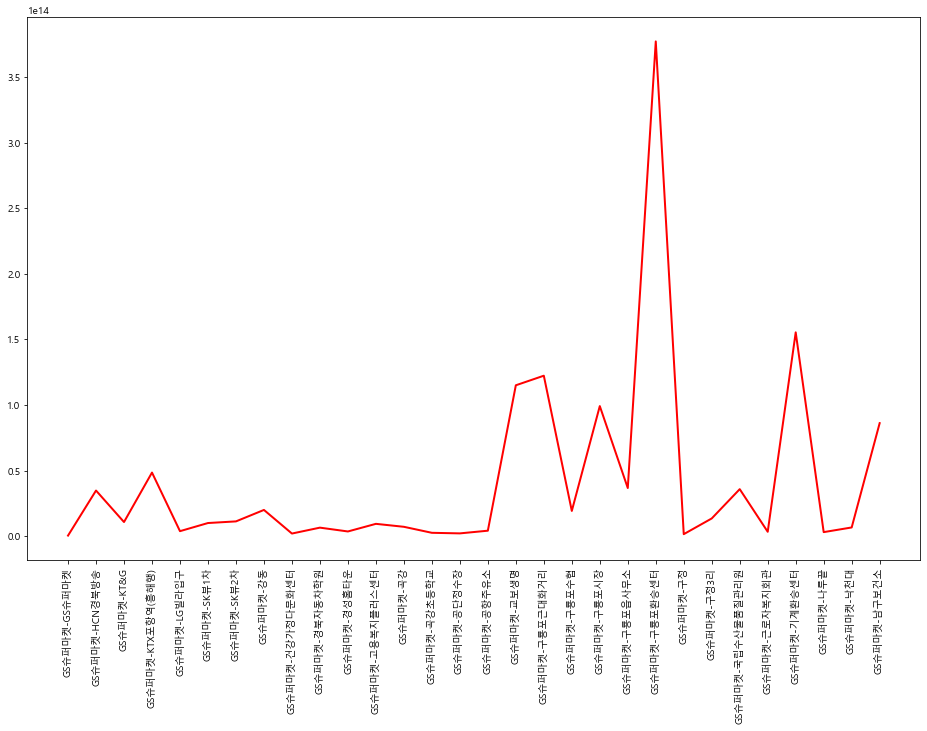

In [148]:
plt.rcParams['figure.figsize'] =(20,10)
#선의 두께 지정
plt.rcParams['lines.linewidth']=2
#폰트지정
plt.rc('font', family = 'Malgun Gothic',size=10)
plt.figure(figsize=(16,10))
plt.plot(trfcard_total_final, c="r")
plt.xticks(rotation=90) # x 축 값 
plt.show()

# 분석 

    > 승하차 정류장별 체류시간(분) 상위 30건을 추출한 결과, 
      상위 1, 2위에서 시외버스 터미널에서 > 죽도시장, 흥해 환승센터 > 죽도시장 에서의 체류시간이 
      가장 높은것으로 보아 포항을 찾는 관광객들이 버스를 이용하여 죽도시장에 방문한것으로 예상된다.
    
    > 전체 데이터에서 하차정류장이 죽도시장인 데이터가 많은것을 보아, 관광객 뿐만 아니라
      포항시민들도 버스를 이용해 죽도시장에 많이 방문한 것으로 보인다. 
   
    